# Linear Regression

Linear regression is one of the simplest models there is. It assumes that there is a linear relation between the attributes to the target variable. It is very simple but it also works very good. 

"All models are wrong, but some are useful".  
-- <cite> George Box.
    
What it is trying to find is the relationship:
$$Y = \beta_{0} + \beta_{1}X$$
Which is basically the line equation. We want to find those coefficients, beta 0 and beta 1. It can be extended to n attributes and n + 1 unknown coefficients.

Here we are dealing with estimates, not the true value, so we can use the following formula:
    
$$\hat{y}_{i} = \hat{\beta}_{0} + \hat{\beta}_{1}*x_{i}$$

Which is the prediction of our regression. Then, we need the residual, which is:
$$e_{i} = y_{i} - \hat{y}_{i}$$
    
The true value minus the predicted value for the i point. The sum of all the squared errors is the function that the regression must minimize.
    $$RSS = e^{2}_{1} + e^{2}_{2} + ... + e^{2}_{n}$$
But we can expand that expression into:
$$RSS = (y_{1} - \hat{y}_{1})^{2} + (y_{2} - \hat{y}_{2})^{2} + ... + (y_{n} - \hat{y}_{n})^{2}$$

Even more:
$$RSS = (y_{1} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{1})^{2} + (y_{2} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{2})^{2} + ... + (y_{n} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{3})^{2}$$
    
They way of minimizing the RSS, the algorithm will find the $\beta_{0}$ and $\beta_{1}$ that optimize the function.
    
$$\hat{\beta_{1}} = \frac{\sum^{n}_{i=1} (x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum^{n}_{i=1} (x_{i}-\bar{x})^{2}}$$
$$\hat{\beta_{0}} = \bar{y} - \hat{\beta_{1}} * \bar{x}$$

Now, implement a linear regression without sklearn. In other words, find both coefficients and the Residual Sum of Squares (RSS). We are using a dataset about Teen Birth Rate. We want to predict the teen birth rate depending on the poverty of the state. The dataset is from the United States.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('OLSDataset.txt',sep='\s+')

In [19]:
data.describe()

,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,13.117647,22.282353,72.019608,7.854902,42.243137
std,4.277228,8.043499,18.975563,8.914131,12.318511
min,5.300000,8.100000,39.000000,0.900000,20.000000
25%,10.250000,17.250000,58.300000,3.900000,33.900000
50%,12.200000,20.000000,69.400000,6.300000,39.500000
75%,15.800000,28.100000,87.950000,9.450000,52.600000
max,25.300000,44.800000,104.300000,65.000000,69.100000


In [22]:
data.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


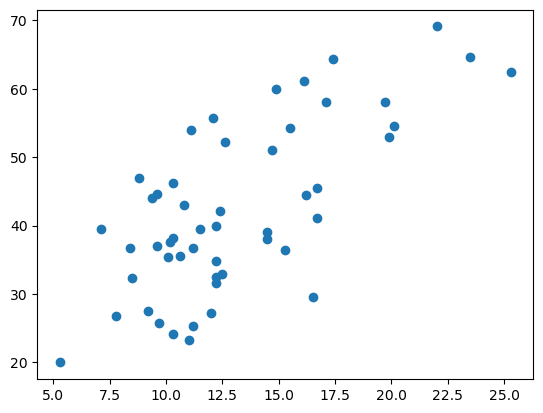

In [3]:
plt.scatter(data['PovPct'], data['TeenBrth']) 

In [3]:

# Calculate RSS
def rss(y, y_hat):
    return sum((y - y_hat) ** 2)

In [9]:
# Calculate the coefficients
def linear_regression_rss(x, y):
    n = len(x)
    x_mean, y_mean = sum(x) / n, sum(y) / n
    x1 = [(i - x_mean) for i in x]
    y1 = [(i - y_mean) for i in y]
    b1 = sum([x1[i] * y1[i] for i in range(n)]) / sum([(i - x_mean) ** 2 for i in x])
    b0 = y_mean - b1 * x_mean
    y_hat = [b0 + b1 * x[i] for i in range(n)]
    residuals = rss(y, y_hat)
    return b0, b1, residuals, y_hat

In [10]:
x = data['PovPct']
y = data['TeenBrth']

b0, b1, residuals,y_hat = linear_regression_rss(x, y)

In [14]:
# Print the results
print('Intercept(Bo): %.3f' % b0)
print('Slope(B1): %.3f' % b1)
print('RSS: %.3f' % residuals)


Intercept(Bo): 15.674
Slope(B1): 2.025
RSS: 3834.543


In [ ]:
plt.scatter(x, y)
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Teen Birth Rate (per 1,000)')

plt.plot(x, y_hat, color='red')

plt.show()

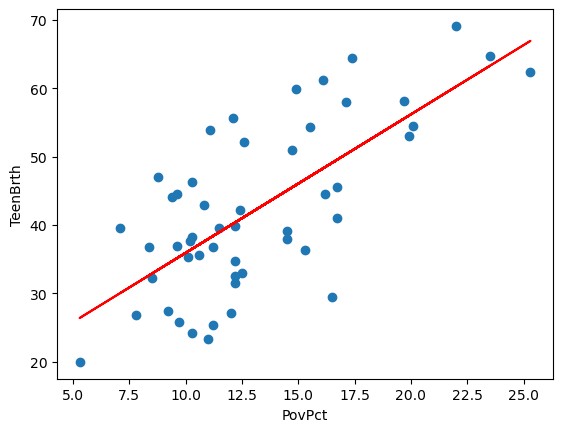

In [18]:
plt.scatter(data['PovPct'], data['TeenBrth']) 
#plt.ylim(ymin=0)
#plt.xlim(xmin=0)
plt.plot(data['PovPct'],y_hat,color='r')
plt.xlabel("PovPct")
plt.ylabel("TeenBrth")

plt.show()

## Exercise

This time, do it the right way. Do a regression for three different train and test divisions, and then calculate the MSE for each one. Plot the three regressions.

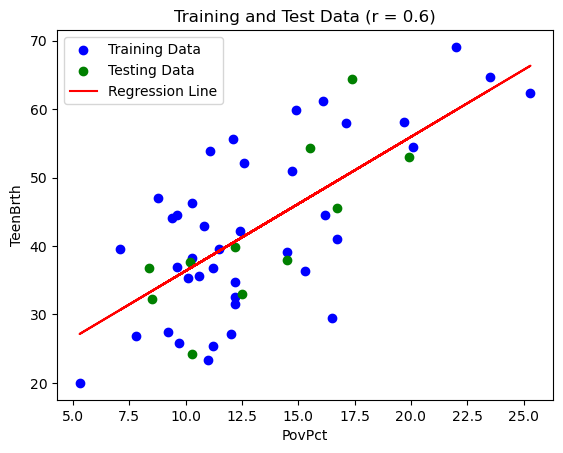

MSE for r = 0.6: nan
Coefficients: b0 = 16.757974851027424, b1 = 1.9603767564714154


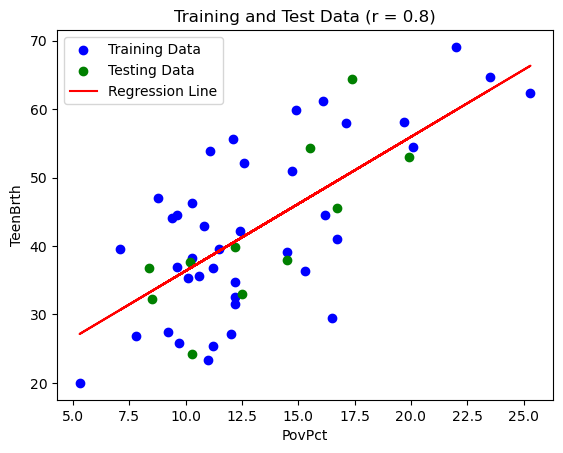

MSE for r = 0.8: nan
Coefficients: b0 = 16.757974851027424, b1 = 1.9603767564714154


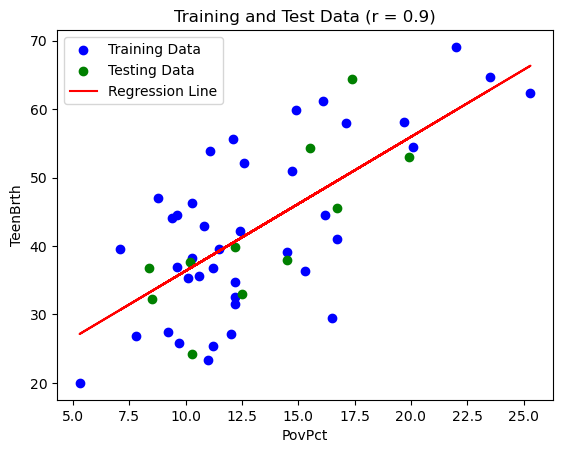

MSE for r = 0.9: nan
Coefficients: b0 = 16.757974851027424, b1 = 1.9603767564714154


In [52]:
r=(0.6,0.8,0.9)
for i in r:
    train_size = int(len(data) * 0.8)
    train_data = data[:train_size]
    test_data = data[train_size:]

    x_train = train_data['PovPct']
    y_train = train_data['TeenBrth']
    x_test = test_data['PovPct']
    y_test = test_data['TeenBrth'].reset_index(drop=True)
    b0, b1, residuals, y_hat_train = linear_regression_rss(x_train, y_train)
    y_hat_test = b0 + b1 * x_test
    b0, b1, residuals, y_hat_train = linear_regression_rss(x_train, y_train)
    y_hat_test = b0 + b1 * x_test
    mse = ((y_test - y_hat_test) ** 2).mean()

    # Plot the results
    plt.scatter(x_train, y_train, color='blue', label='Training Data')
    plt.scatter(x_test, y_test, color='green', label='Testing Data')
    plt.plot(x_train, y_hat_train, color='red', label='Regression Line')
    plt.xlabel('PovPct')
    plt.ylabel('TeenBrth')
    plt.title('Training and Test Data (r = {})'.format(i))
    plt.legend()
    plt.show()

    print("MSE for r = {}: {}".format(i, mse))
    print("Coefficients: b0 = {}, b1 = {}".format(b0, b1))


In [53]:
print(train_data.isnull().sum())

Location      0
PovPct        0
Brth15to17    0
Brth18to19    0
ViolCrime     0
TeenBrth      0
dtype: int64


In [56]:
print(y_hat_test.isnull().sum())

0


# Multiple Linear Regression

The same can be done but with multiple attributes. In this case, there will be one coefficient for each attribute:  

$$y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + ... + \beta_{n}x_{n} + \epsilon$$  


Use the following dataset, to predict the G3 column. It is the grade of the year for the students. Multiple variables are categorical, remember to convert them to numerical. Other columns might not add value to the prediction, so you can also do some feature engineering. 

Usually while computing regression, we need to add a new column for the intercept term, in the data. That way we can do:
$$f(x') = \beta^{'T}x'$$
Because $\beta'$ will contain the intercept term, $\beta' = (\beta_{0},\beta_{1},...,\beta_{n})$

That gives us the following equation:

$$y = X*\beta+\epsilon$$

The optimization problem is to find the $\hat\beta$ that minimize the loss $L(\hat{\beta}) = \hat{\epsilon}^{T}\hat{\epsilon}$
The solution is:

$$\hat{\beta} = (X^{T}X)^{-1}X^{T}y$$

Inverting takes $O(n^{3})$ so it is unfeasible for datasets with many dimensions.

In [12]:
X = data[['PovPct','ViolCrime']]
y = data['TeenBrth']

In [14]:
X = X.to_numpy()
y = y.to_numpy()

In [19]:
import statsmodels.api as sm

C:\Users\srodriguezb\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\srodriguezb\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Polynomial Regression

What if the data is not linear? In that case, a linear regression wouldn't work because it does not capture how the data is. Then, we can try to fit a regression but in a with a higher polynomial. This can be done by transforming the data in the following way:


$$X = \begin{pmatrix}
1 & x_{1} & x_{1}^{2} & x_{1}^{3}\\
1 & x_{2} & x_{2}^{2} & x_{2}^{3}\\
\vdots & \vdots & \vdots & \vdots \\
1 & x_{3} & x_{3}^{2} & x_{3}^{3}\\
\end{pmatrix}$$

We take each input and take it into a higher polynomial. Also, include the intercept term. We can do it again by hand, but in this case, we are going to use our friend Sklearn.

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [24]:
def functionf(x):
    arr = []
    for i in x:
        arr.append(2-i+(i**2))
    return np.array(arr)

In [25]:
def sample_ds(n):
    x = np.random.uniform(-3,3,n)
    e = np.random.normal(0,0.4,n)
    y = np.add(functionf(x),e)
    return x,y

## Exercise

Train a linear regression for polynomials between 1 and 8, calculate the MSE for training set, validation set and test set. Generate a train set of 10 points, then a validation set of 10 points and then a test set of 1000 points. Fit a linear regression with polynomial features.

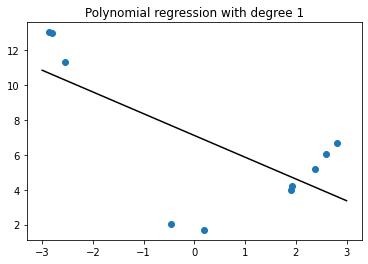